<a href="https://colab.research.google.com/github/amr552/Data_science/blob/main/student_score_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#data analysis of Marketing sales dataset

##import libraries Toolkites


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##load datasets

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/DS Mostafa Othman dataset/student_performance.csv')
df.head()

,student_id,gender,age,study_hours,part_time_job,math_score,english_score,science_score
0,1,Male,24,7.0,No,77.0,85.0,80.0
1,2,Male,21,10.9,Yes,101.0,101.0,104.0
2,3,Female,22,7.3,Yes,90.0,84.0,96.0
3,4,Male,24,5.8,Yes,89.0,76.0,70.0
4,5,Male,20,14.4,Yes,117.0,101.0,126.0


##cleaning data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   student_id     41 non-null     int64  
 1   gender         41 non-null     object 
 2   age            41 non-null     int64  
 3   study_hours    38 non-null     float64
 4   part_time_job  41 non-null     object 
 5   math_score     36 non-null     float64
 6   english_score  38 non-null     float64
 7   science_score  38 non-null     float64
dtypes: float64(4), int64(2), object(2)
memory usage: 2.7+ KB


In [ ]:
df.isnull().sum()

,0
student_id,0
gender,0
age,0
study_hours,3
part_time_job,0
math_score,5
english_score,3
science_score,3


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

,0
student_id,0
gender,0
age,0
study_hours,0
part_time_job,0
math_score,0
english_score,0
science_score,0


In [ ]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

##preprocessing

##Univariate analysis questions


*   statis values of study_hours column ( from the result i could the normal hours of studying for a student and upon that i could category student work_hard level in the future )  (avg study_hour is 9 hour )

*   statistics values for school subjects ( from the avg of testing grades i could know how much the subject test hard or easy and know the percent of student passed in each subject)  (mean of subjects are high which mean exams were easy)

## Bivariate analysis questions

* count of each Gender Regarding of Part_time_job (figure out which gender work more so i could know a little bit about the geographics cultures)
* study_hour vs gender ( to know is the girls study more than boys and could link this with subjects_score later)
*study_hour vs part_time_job (so i could answering the question of How much students work effect their performance of studying)
* part_time_job vs average of all subjects


## Multivariate analysis

*student have got more thant 75% vs stuy_hours, and part time jobs ( studying_hour vs part_time_job of the average of all subjects for each student

*






In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport as rp

In [ ]:
rp(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 65.14it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#count of each Gender Regarding of Part_time_job
gender_parttime_counts = df.groupby(['gender', 'part_time_job']).size().unstack(fill_value=0)
display(gender_parttime_counts)

part_time_job,No,Yes
gender,,
Female,6,7
Male,11,11


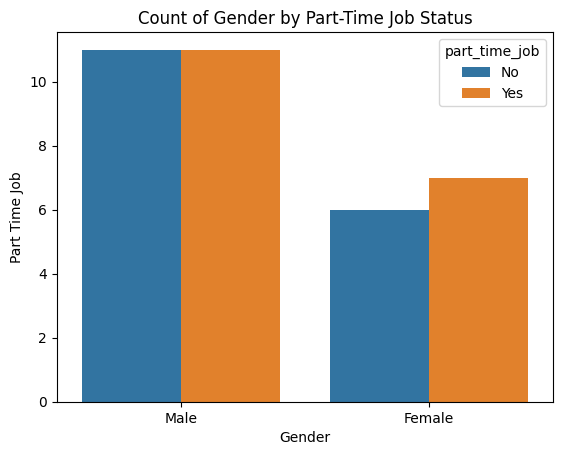

In [ ]:
sns.countplot(data=df, x='gender', hue='part_time_job')
plt.title('Count of Gender by Part-Time Job Status')
plt.xlabel('Gender')
plt.ylabel('Part Time Job')
plt.show()

In [ ]:
# study_hour vs gender ( to know is the girls study more than boys and could link this with subjects_score later)
df.groupby('gender')['study_hours'].mean()

,study_hours
gender,
Female,8.946154
Male,9.186364


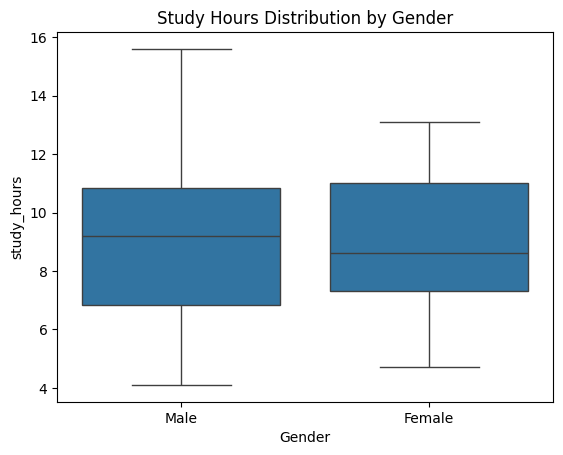

In [ ]:
sns.boxplot(data=df,x='gender',y='study_hours')
plt.title('Study Hours Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('study_hours')
plt.show()

In [ ]:
# study_hour vs part_time_job (so i could answering the question of How much students work effect their performance of studying)
df['average_score'] = round(df[['math_score', 'english_score', 'science_score']].mean(axis=1), 2)
df.groupby('part_time_job')[['study_hours','average_score']].mean()

,study_hours,average_score
part_time_job,,
No,9.935294,100.432353
Yes,8.305556,89.721667


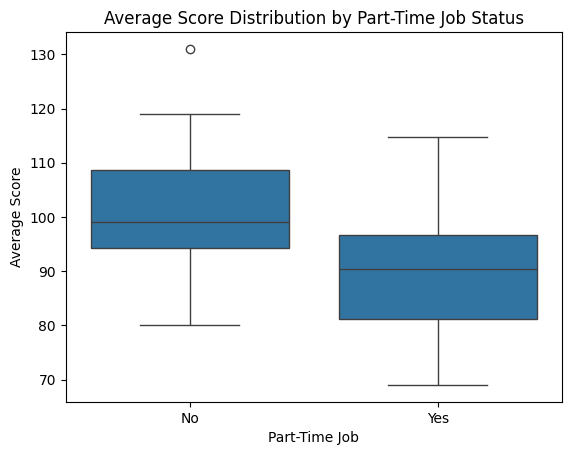

In [ ]:
sns.boxplot(data=df, x='part_time_job', y='average_score')
plt.title('Average Score Distribution by Part-Time Job Status')
plt.xlabel('Part-Time Job')
plt.ylabel('Average Score')
plt.show()



In [ ]:
#study_hour vs part_time_job (so i could answering the question of How much students work effect their performance of studying)
df.groupby('part_time_job')[['study_hours','average_score']].mean()

,study_hours,average_score
part_time_job,,
No,9.935294,100.432353
Yes,8.305556,89.721667


In [ ]:
part_time_students = df[df['part_time_job'] == 'Yes'].copy()
part_time_students['average_score'] = round(part_time_students[['math_score', 'english_score', 'science_score']].mean(axis=1),2)
high_achieving_part_time_students = part_time_students.sort_values(by='average_score', ascending=True)
display(high_achieving_part_time_students)

,student_id,gender,age,study_hours,part_time_job,math_score,english_score,science_score,average_score
21,22,Male,22,4.1,Yes,68.0,62.0,77.0,69.00
33,34,Female,19,4.7,Yes,79.0,70.0,69.0,72.67
7,8,Male,22,5.7,Yes,67.0,71.0,82.0,73.33
3,4,Male,24,5.8,Yes,89.0,76.0,70.0,78.33
28,29,Male,25,5.6,Yes,70.0,82.0,89.0,80.33
19,20,Female,20,6.3,Yes,90.0,83.0,77.0,83.33
36,37,Female,21,8.0,Yes,83.0,79.0,91.0,84.33
27,28,Female,19,9.1,Yes,90.0,80.0,90.0,86.67
2,3,Female,22,7.3,Yes,90.0,84.0,96.0,90.00
6,7,Male,22,10.2,Yes,90.0,93.0,89.0,90.67


In [ ]:
gender_study_correlation = high_achieving_part_time_students[['study_hours', 'average_score','gender']]
display(gender_study_correlation)

,study_hours,average_score,gender
21,4.1,69.00,Male
33,4.7,72.67,Female
7,5.7,73.33,Male
3,5.8,78.33,Male
28,5.6,80.33,Male
19,6.3,83.33,Female
36,8.0,84.33,Female
27,9.1,86.67,Female
2,7.3,90.00,Female
6,10.2,90.67,Male


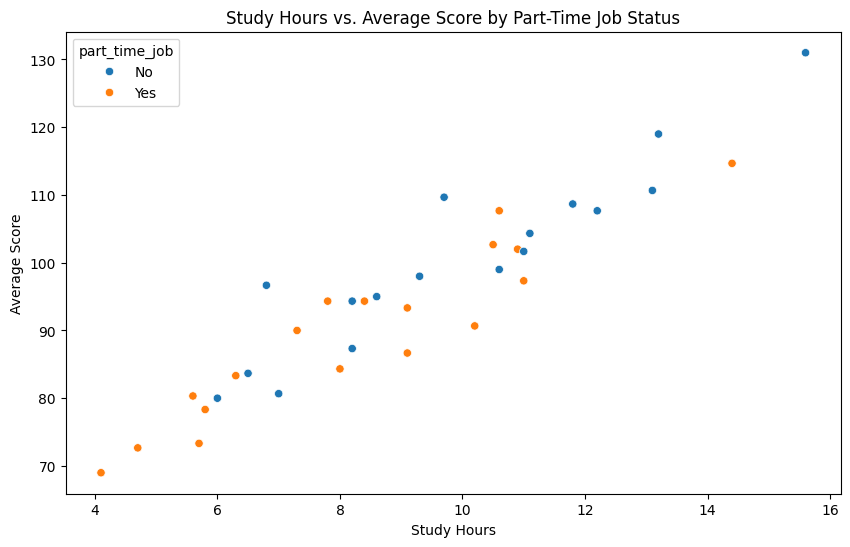

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='study_hours', y='average_score', hue='part_time_job')
plt.title('Study Hours vs. Average Score by Part-Time Job Status')
plt.xlabel('Study Hours')
plt.ylabel('Average Score')
plt.show()